In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Data Preprocessing Tools**

**Importing the libraries:**

In order to perform data preprocessing using Python, we need to import some predefined Python libraries.

In [ ]:
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn.preprocessing import Normalizer # used for feature scaling

**Importing the dataset:**

To create a machine learning model, the first thing we required is a dataset as a machine learning model completely works on data. The collected data for a particular problem in a proper format is known as the dataset.

In [ ]:
path="/content/drive/MyDrive/dataset/avocado.csv"
df = pd.read_csv(path) # to import the dataset into a variable

**Handling of Missing Data:**

If our dataset contains some missing data, then it may create a huge problem for our machine learning model. So the missing values are to dealt properly. There are mainly two ways to handle missing data, which are:

*  By deleting the particular row
*  By calculating the mean/median/mode of the column

If the number of rows having the missing values are less, or it is advised not to fill in missing values, then we can drop the missing rows by using dropna() in pandas.

In [ ]:
# Handling missing values (if any)
# For numerical columns, fill missing values with the median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, fill missing values with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

**Handling outliers**

First we visualise the outliers before handling them

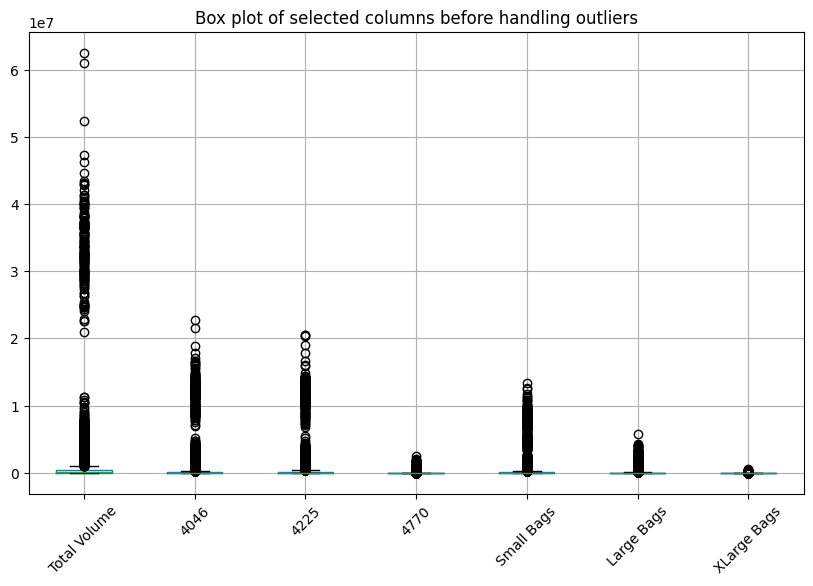

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into avocado_train
# Let's plot box plots for a few columns as an example
columns_to_plot = ['Total Volume', '4046', '4225', '4770','Small Bags','Large Bags','XLarge Bags']  # Add or remove columns as needed

plt.figure(figsize=(10, 6))
df[columns_to_plot].boxplot()
plt.title('Box plot of selected columns before handling outliers')
plt.xticks(rotation=45)
plt.show()

handling the outliers

In [ ]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = pd.np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = pd.np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply to each column in your dataframe (or a subset of columns)
for column in columns_to_plot:
    handle_outliers(df, column)


<ipython-input-6-f4d95579972f>:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df[column] = pd.np.where(df[column] < lower_bound, lower_bound, df[column])
<ipython-input-6-f4d95579972f>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df[column] = pd.np.where(df[column] > upper_bound, upper_bound, df[column])
<ipython-input-6-f4d95579972f>:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df[column] = pd.np.where(df[column] < lower_bound, lower_bound, df[column])
<ipython-input-6-f4d95579972f>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df[column] = pd.np.where(df[column] > upper_bound, upper_bound, df[column])
<ipython-input-6

Box plot after handling outliers

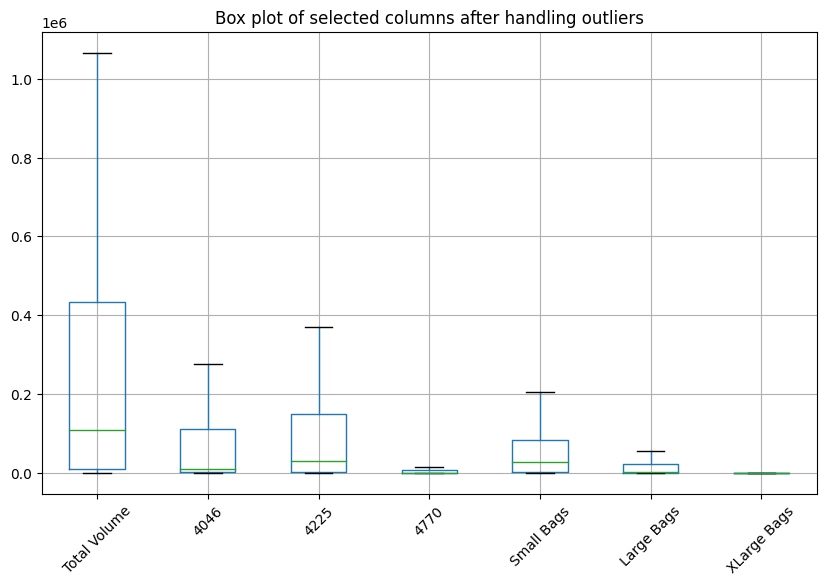

In [ ]:
plt.figure(figsize=(10, 6))
df[columns_to_plot].boxplot()
plt.title('Box plot of selected columns after handling outliers')
plt.xticks(rotation=45)
plt.show()

**Visulalizing the distribution of 'type' before encoding:**

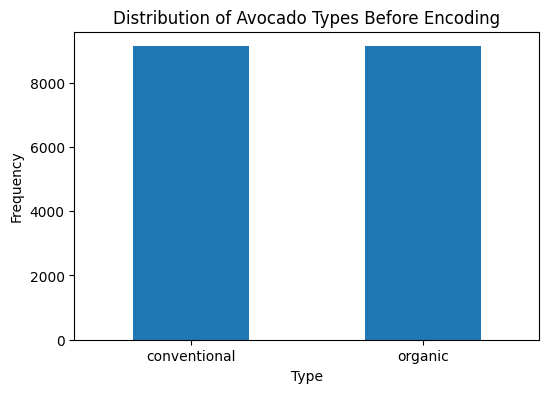

In [ ]:
# Visualize the distribution of 'type' before encoding
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Avocado Types Before Encoding')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

**Visualizing 'region' before encoding:**

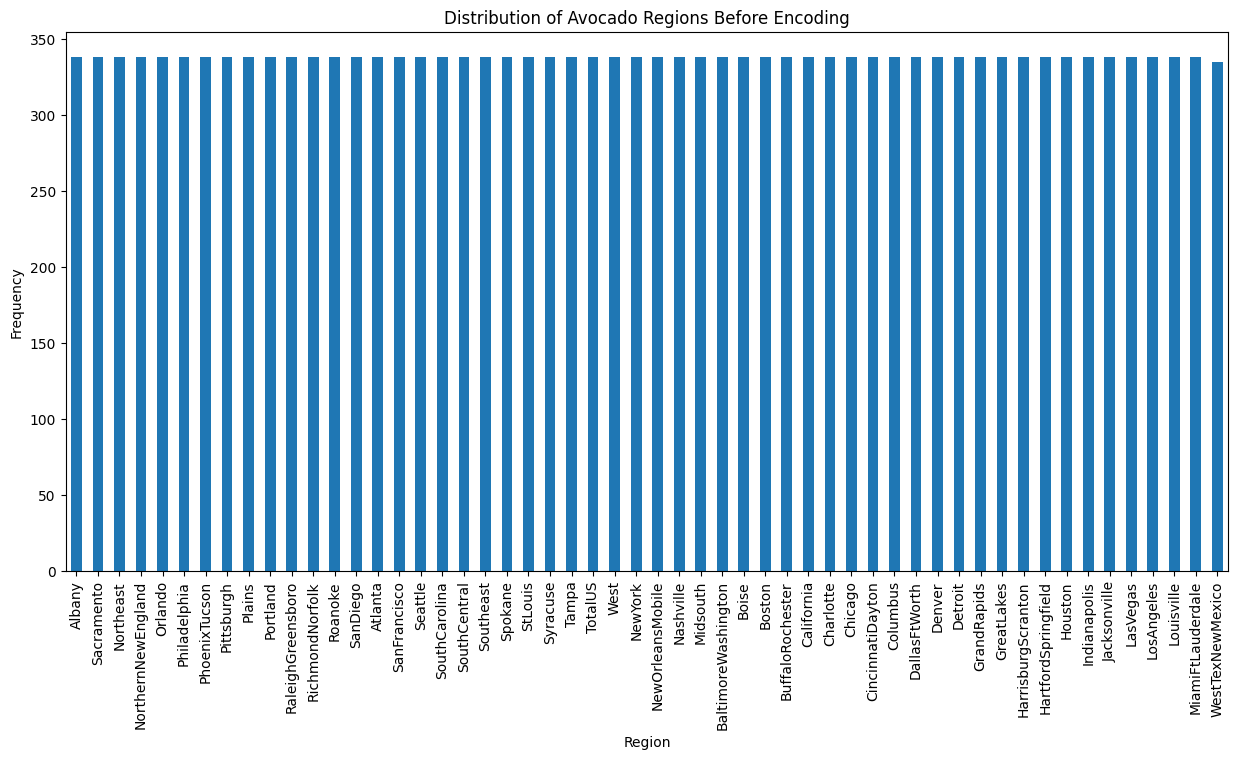

In [ ]:
# Plot the histogram for the 'region' data before encoding
plt.figure(figsize=(15, 7))  # Adjust the size as needed to accommodate the number of regions
df['region'].value_counts().plot(kind='bar')
plt.title('Distribution of Avocado Regions Before Encoding')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the x labels to make them readable if there are many categories
plt.show()

**Handling of Categorical Data:**

Categorical data is data which has some categories such as, in our dataset; there are two categorical variable, type, and region.

Since machine learning models are based on mathematical equations it's intuitive that it would cause some problem if we keep the text here in the equations. So, we need to encode the categorical variables into numbers.

There are 2 common ways to do so.

*   Label Encoding
*   One Hot Encoding



**Label encoding Type column :**

In [ ]:
# Label encode 'type' column
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

**One - Hot encoding region Column :**

In [ ]:
# One-hot encode 'region' column
df = pd.get_dummies(df, columns=['region'], prefix='region')

**Visualizing type after encoding:**

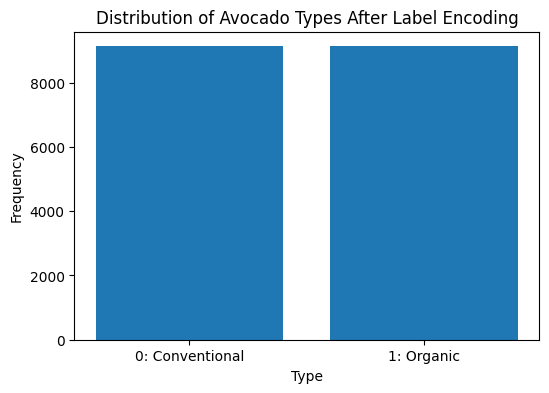

In [ ]:
# Corrected code for plotting the histogram
plt.figure(figsize=(6, 4))
# Plotting the histogram without the 'labels' parameter
counts, bins, patches = plt.hist(df['type_encoded'], bins=[-0.5, 0.5, 1.5], rwidth=0.8)
plt.xticks(ticks=[0, 1], labels=['0: Conventional', '1: Organic'])
plt.title('Distribution of Avocado Types After Label Encoding')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

**Visualizing region after encoding:**

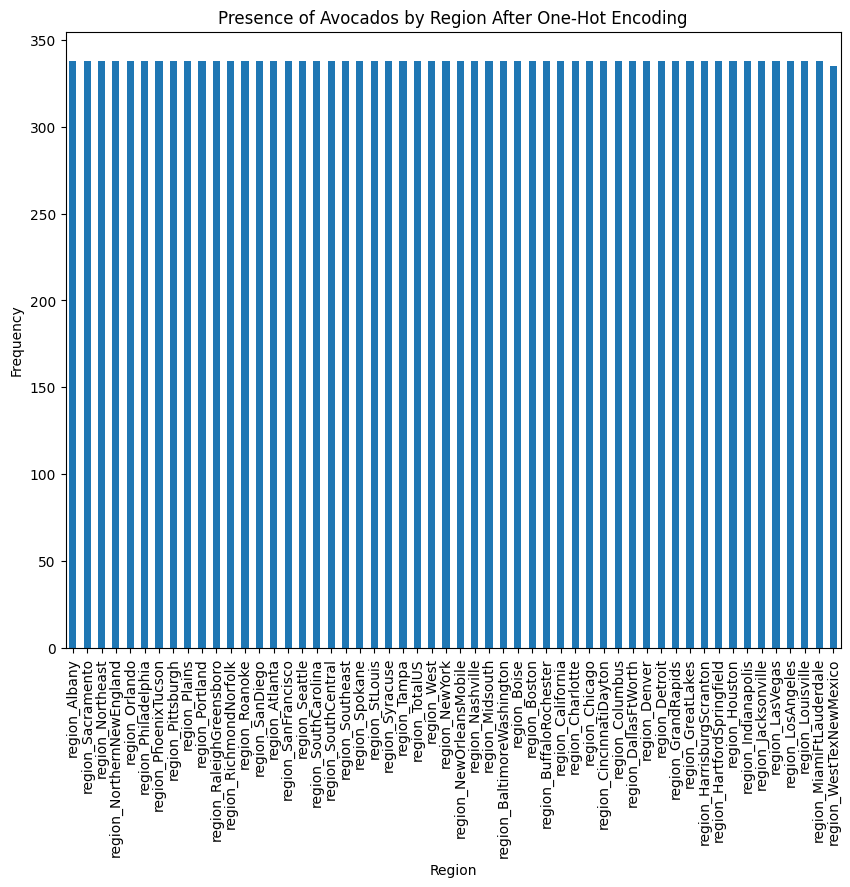

In [ ]:
# Assuming the DataFrame 'df' has been one-hot encoded for the 'region' column
region_columns = [col for col in df.columns if col.startswith('region_')]
region_presence = df[region_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
region_presence.plot(kind='bar')
plt.title('Presence of Avocados by Region After One-Hot Encoding')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate labels to make them readable
plt.show()


**Boxplot for 'AveragePrice' before handling outliers**

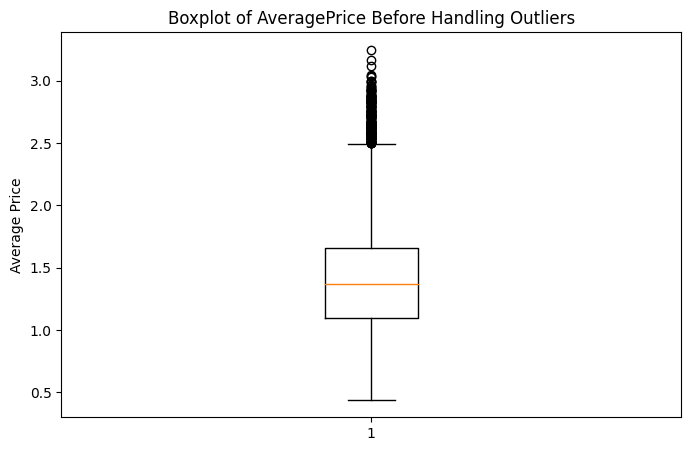

In [ ]:
# Boxplot for 'AveragePrice' before handling outliers
plt.figure(figsize=(8, 5))
plt.boxplot(df['AveragePrice'])
plt.title('Boxplot of AveragePrice Before Handling Outliers')
plt.ylabel('Average Price')
plt.show()

The boxplot for AveragePrice before handling outliers shows the presence of several outliers, primarily above the upper quartile.

To handle outliers, we can apply a method such as trimming (removing outliers) or capping (limiting outlier values). For this dataset, capping might be more appropriate to retain as much data as possible. We'll cap outliers by applying the interquartile range (IQR) method, limiting values to within a specified range beyond the 1st and 3rd quartiles. Let's proceed with this approach. ​

**Handling outliers for 'AveragePrice'**

In [ ]:
# Handling outliers for 'AveragePrice'
Q1 = df['AveragePrice'].quantile(0.25)
Q3 = df['AveragePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['AveragePrice'] = df['AveragePrice'].clip(lower=lower_bound, upper=upper_bound)


**Boxplot for 'AveragePrice' after handling outliers**

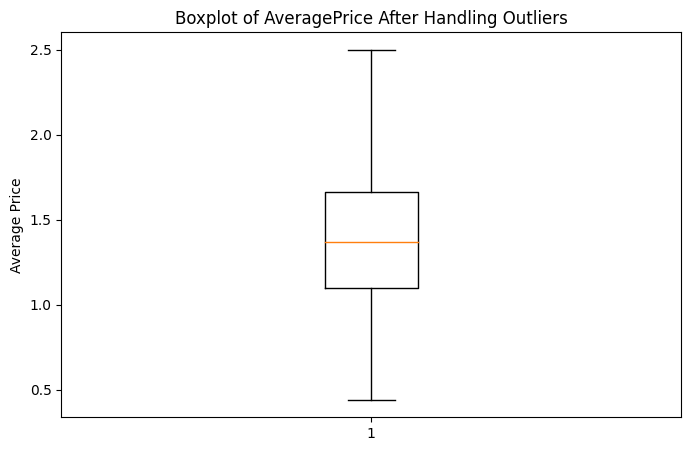

In [ ]:
# Boxplot for 'AveragePrice' after handling outliers
plt.figure(figsize=(8, 5))
plt.boxplot(df['AveragePrice'])
plt.title('Boxplot of AveragePrice After Handling Outliers')
plt.ylabel('Average Price')
plt.show()

The boxplot for AveragePrice after handling outliers shows that the outlier values have been capped at the upper and lower bounds, resulting in a cleaner distribution without extreme outliers.

**Feature Scaling:**

It is a technique to standardize the independent variables of the dataset in a specific range. In feature scaling, the variables are brought into same range and in the same scale so that no any variable dominate the other variable.
There are several ways to do so. Following are 2 common ways to normalize/standardize a dataset.





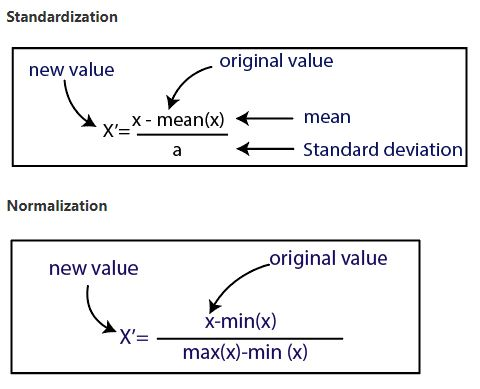


Next, we'll scale the numerical data. Since the range of values varies significantly across different columns, standardization (which transforms data to have a mean of 0 and a standard deviation of 1) is suitable. This will be particularly useful for any machine learning models that might be sensitive to the scale of the data.

In [ ]:
# Separate features and target variable, excluding 'Date' from features to be scaled
features = df.drop(['AveragePrice', 'Date', 'type'], axis=1)  # Assuming preprocessing on 'type' is done beforehand
target = df['AveragePrice']
date_series = df['Date']  # Retain the Date column

In [ ]:
# Split the data into training and testing sets first
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Also split the 'Date' column to align with the train-test split
date_train, date_test = train_test_split(date_series, test_size=0.3, random_state=42)

# Now scale the features excluding 'Date'
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Splitting the dataset into the Training set and Test set:**

Any machine learning algorithm needs to be tested for accuracy. In order to do that, we divide our data set into two parts: training set and testing set. The training set is used to make the algorithm learn the patterns present in the data during training and test dataset is used to check the correctness of the algorithm during testing.

In [ ]:
# Convert the scaled arrays back to DataFrame and reattach the 'Date' column
X_train_df = pd.DataFrame(X_train_scaled, columns=features.columns, index=X_train.index)
X_test_df = pd.DataFrame(X_test_scaled, columns=features.columns, index=X_test.index)
X_train_df['Date'] = date_train
X_test_df['Date'] = date_test

# Ensure 'Date' column is at the first position
X_train_df = X_train_df[['Date'] + [col for col in X_train_df.columns if col != 'Date']]
X_test_df = X_test_df[['Date'] + [col for col in X_test_df.columns if col != 'Date']]

# Combine with the target variable for saving
train_df = pd.concat([X_train_df, y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test_df, y_test.reset_index(drop=True)], axis=1)
# Save the datasets to CSV files
train_file_path = '/content/drive/MyDrive/dataset/train_avocado.csv'
test_file_path = '/content/drive/MyDrive/dataset/test_avocado.csv'
train_df.to_csv(train_file_path, index=False)
test_df.to_csv(test_file_path, index=False)

print("Preprocessing complete. Files saved.")

Preprocessing complete. Files saved.


In [ ]:
print("Final Dataset Characteristics:")
print(f"- Total records in training set: {train_df.shape[0]}")
print(f"- Total records in testing set: {test_df.shape[0]}")
print(f"- Number of features used: {len(features.columns)}")
print("- Date column included and in datetime format.")
print("- Categorical variables encoded appropriately.")
print("- Features scaled to standardize data distribution.")
print("- Data split into training and testing sets for model training and evaluation.")

# Display first few rows of the training set to show the outcome
print("\nFirst few rows of the training set:")
print(train_df.head())

Final Dataset Characteristics:
- Total records in training set: 16629
- Total records in testing set: 9326
- Number of features used: 64
- Date column included and in datetime format.
- Categorical variables encoded appropriately.
- Features scaled to standardize data distribution.
- Data split into training and testing sets for model training and evaluation.

First few rows of the training set:
            Date  Total Volume      4046      4225      4770  Total Bags  \
8704  2018-01-14      2.089974  2.066390  1.459584  0.355770    0.233870   
5271  2016-08-14     -0.556416 -0.457177 -0.619327 -0.269033   -0.204537   
7654  2017-07-16     -0.061005  0.189296 -0.141064 -0.350850   -0.146866   
2417  2015-07-05      2.089974  2.066390  2.049735  1.947732    0.667323   
11906 2015-07-05     -0.745333 -0.639540 -0.709116 -0.656297   -0.243112   

       Small Bags  Large Bags  XLarge Bags      year  ...  \
8704     2.092635    1.992356    -0.048688  1.967399  ...   
5271    -0.244166   -0

**Questions:**

**1) Price Trend Over Time by Type:**

How has the average price of conventional and organic avocados changed over time?


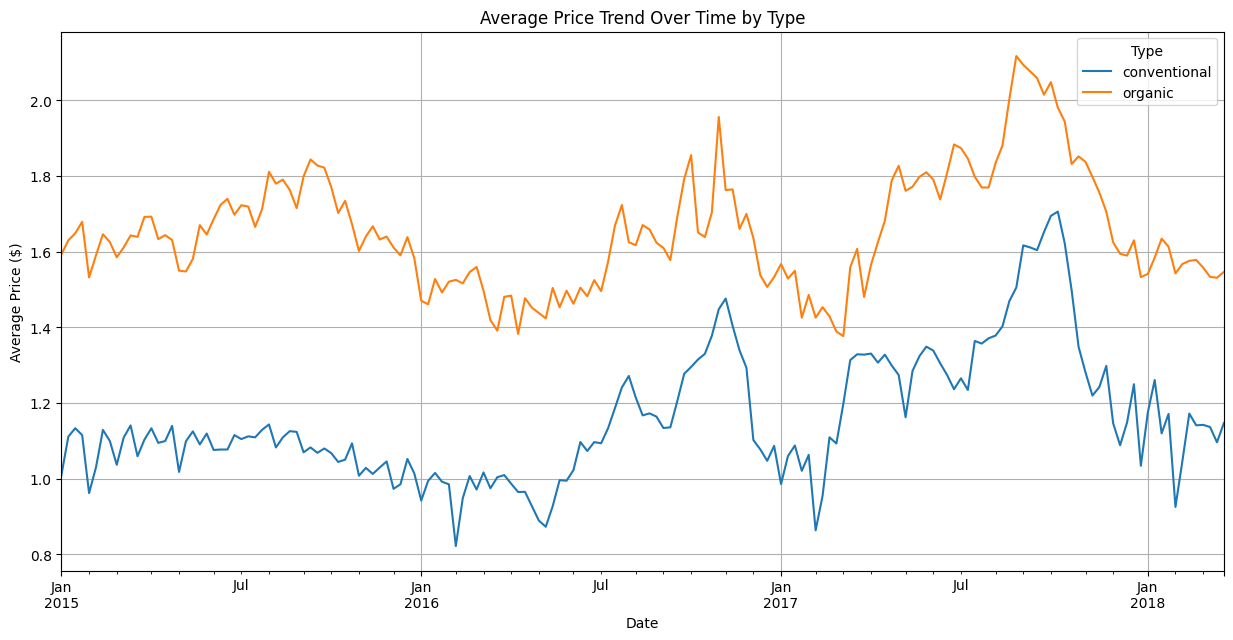

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/avocado.csv')

# Ensure 'Date' is a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Date' and 'type', then calculate the mean of 'AveragePrice'
price_trends = df.groupby(['Date', 'type'])['AveragePrice'].mean().unstack()

# Plotting the trends
plt.figure(figsize=(15, 7))
price_trends.plot(kind='line', ax=plt.gca())
plt.title('Average Price Trend Over Time by Type')
plt.xlabel('Date')
plt.ylabel('Average Price ($)')
plt.legend(title='Type')
plt.grid(True)
plt.show()

**Inferences:**


*   Organic avocados tend to be pricier than conventional ones, which is consistent with organic produce generally costing more due to more expensive farming practices and lower yields.
*   The price of organic avocados shows higher volatility, with more pronounced peaks and troughs compared to conventional avocados. This could suggest that the organic avocado market is more sensitive to changes in supply and demand.
*   There appears to be a seasonal pattern, with prices for both types of avocados peaking and dipping at similar times each year, which suggests that certain times of the year may have higher prices due to factors such as reduced supply or increased demand.

**2) Volume vs. Price Analysis by Region:**

Is there a relationship between the average price of avocados and the total volume sold, broken down by region?

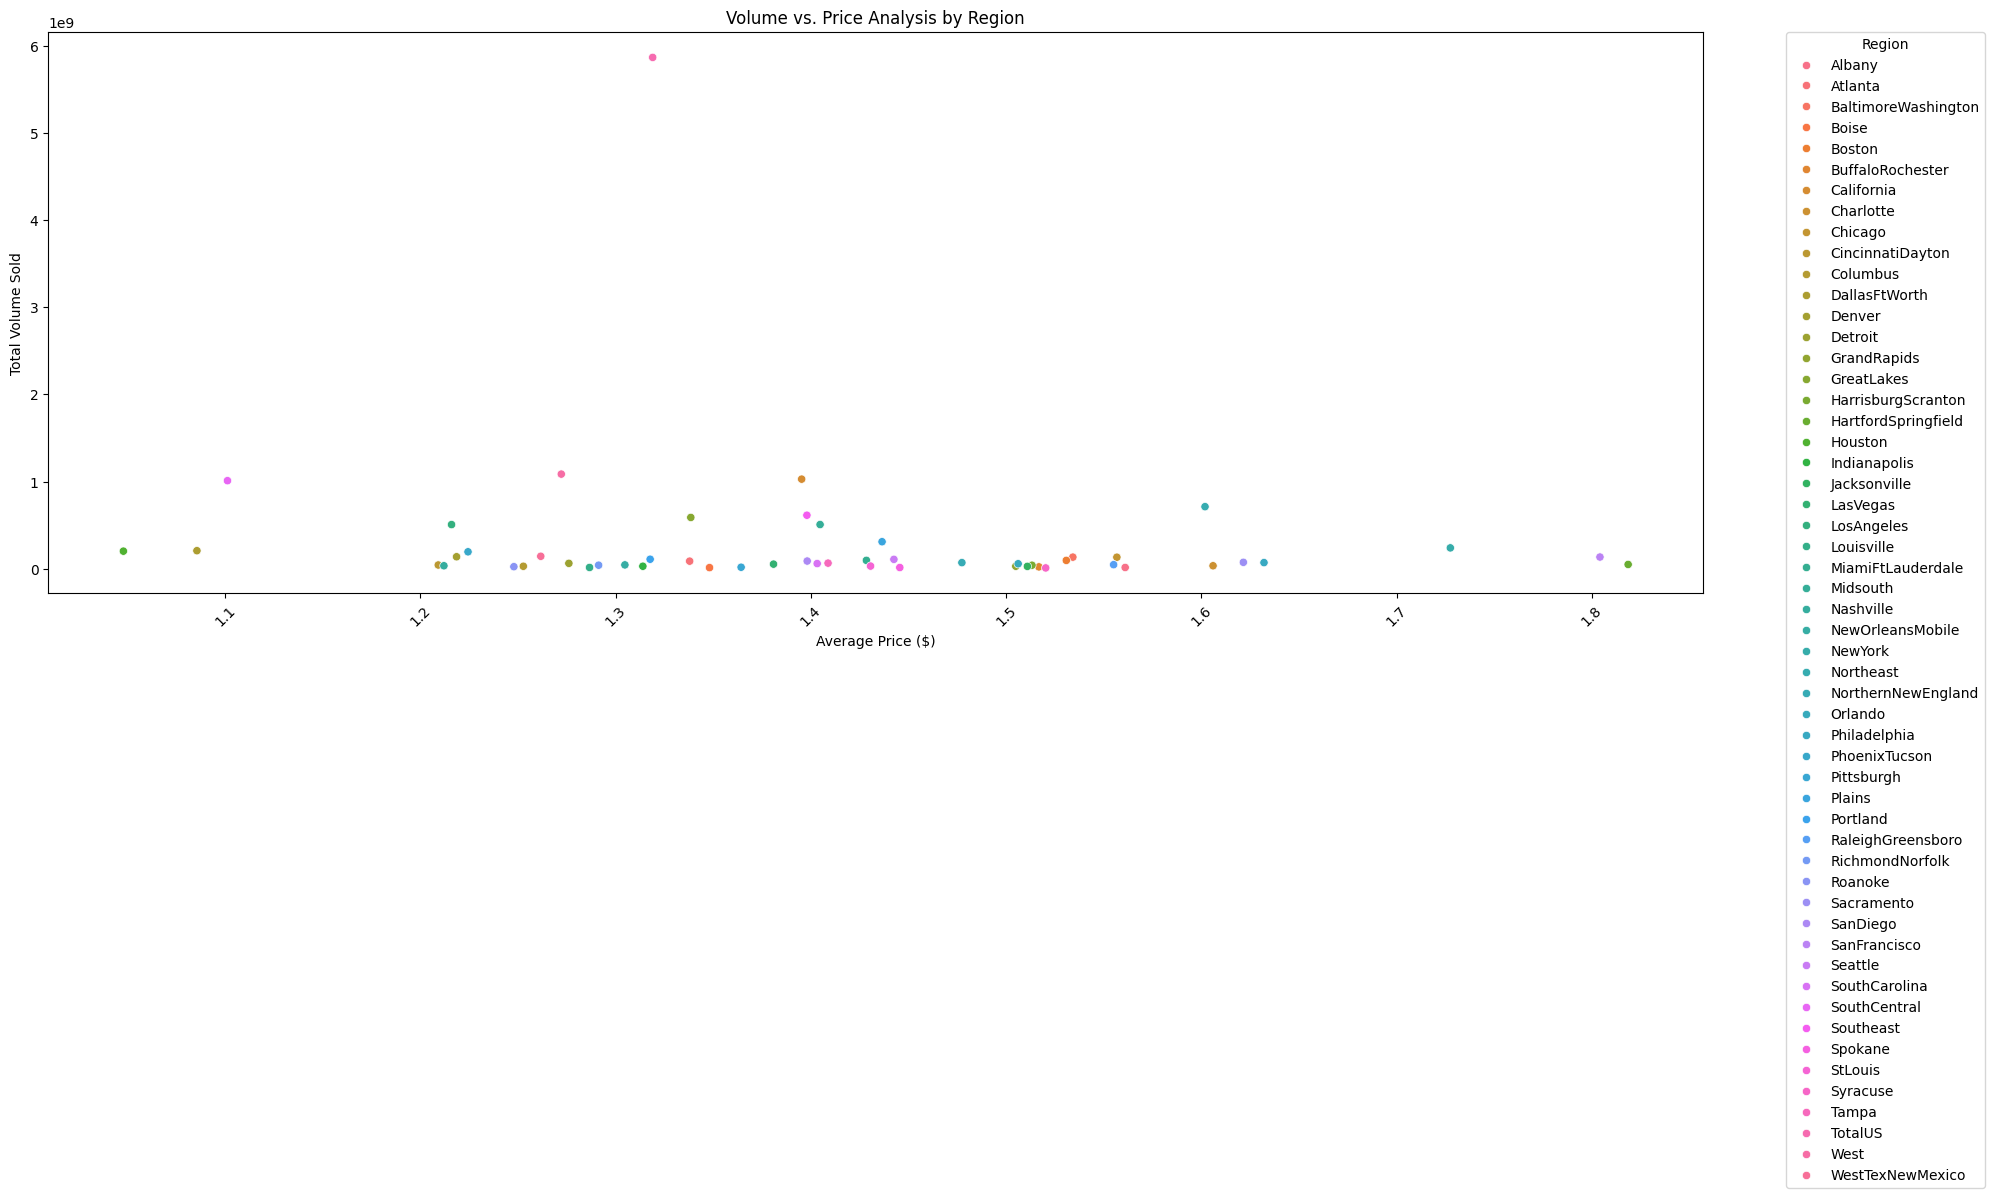

In [ ]:
import seaborn as sns

# Calculate the mean AveragePrice and sum of TotalVolume for each region
region_stats = df.groupby('region').agg({
    'AveragePrice': 'mean',
    'Total Volume': 'sum'
}).reset_index()

# Create the scatter plot
plt.figure(figsize=(20, 10))  # Adjust the size to fit all region names if needed
sns.scatterplot(data=region_stats, x='AveragePrice', y='Total Volume', hue='region')

# Improve the readability of the plot
plt.title('Volume vs. Price Analysis by Region')
plt.xlabel('Average Price ($)')
plt.ylabel('Total Volume Sold')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # Place legend outside the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Show the plot
plt.show()


**Inferences:**


*   Generally, there doesn't appear to be a clear, consistent relationship between average price and total volume sold across regions. There are regions with high volume sales across a range of prices, suggesting that price is not the only factor influencing volume sold.
*   Most regions have a total volume sold concentrated at the lower end of the graph, indicating that the majority of regions have a relatively similar range of total volume sold.
*   The average price for most regions clusters between $1.0 and $1.6, with fewer regions having an average price outside this range.
*   There are a few regions with significantly higher total volumes sold than others, as indicated by the dots towards the top of the graph. These could represent larger markets or regions with more extensive distribution networks.
* The regions with the highest volume sold do not have the highest average prices, which could suggest economies of scale or that regions with larger supply chains can afford to sell avocados at a lower price.

**3) Seasonal Patterns in Avocado Sales**:

Are there seasonal patterns in the total number of avocados sold, and do these patterns differ between conventional and organic avocados?

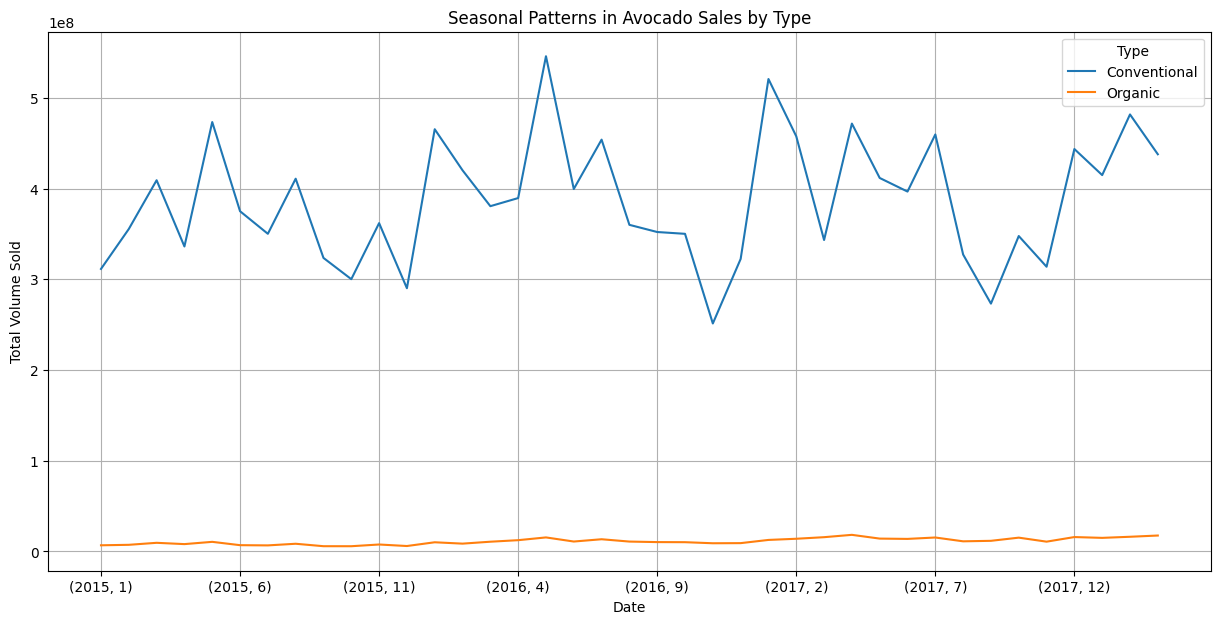

In [ ]:
# Ensure 'Date' is a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Aggregate data to find total volume sold by month, year, and type
monthly_volume = df.groupby(['Year', 'Month', 'type'])['Total Volume'].sum().unstack('type')

# Sort the index to ensure the months are in correct order
monthly_volume = monthly_volume.sort_index()

# Plotting the monthly volume trends by type
plt.figure(figsize=(15, 7))
for avocado_type in monthly_volume.columns:
    monthly_volume[avocado_type].plot(label=avocado_type.capitalize())

plt.title('Seasonal Patterns in Avocado Sales by Type')
plt.xlabel('Date')
plt.ylabel('Total Volume Sold')
plt.legend(title='Type')
plt.grid(True)
plt.show()

**Inferences:**


*   There is a significant difference in sales volume between conventional and organic avocados, with conventional avocados showing a much higher volume of sales.
*   The conventional avocado sales exhibit a clear seasonal pattern, with peaks and troughs corresponding to certain times of the year. This could be due to various factors like changes in supply due to harvest cycles, seasonal demand, or holiday effects.

*   Organic avocado sales volume is much lower than conventional, which could be due to higher prices, less availability, or lower demand compared to conventional avocados.
*   The organic avocado sales line is relatively flat compared to the conventional one, suggesting that the organic avocado market is more stable across the year or that the seasonal factors affecting conventional avocados don't impact organic sales as much.
*   The conventional avocado market is much larger than the organic market, as indicated by the total volume sold, which suggests conventional avocados are more popular or accessible.

**4) Price Elasticity of Demand by Region**:

Which regions show the greatest sensitivity in volume sold relative to changes in avocado prices (i.e., price elasticity of demand)?

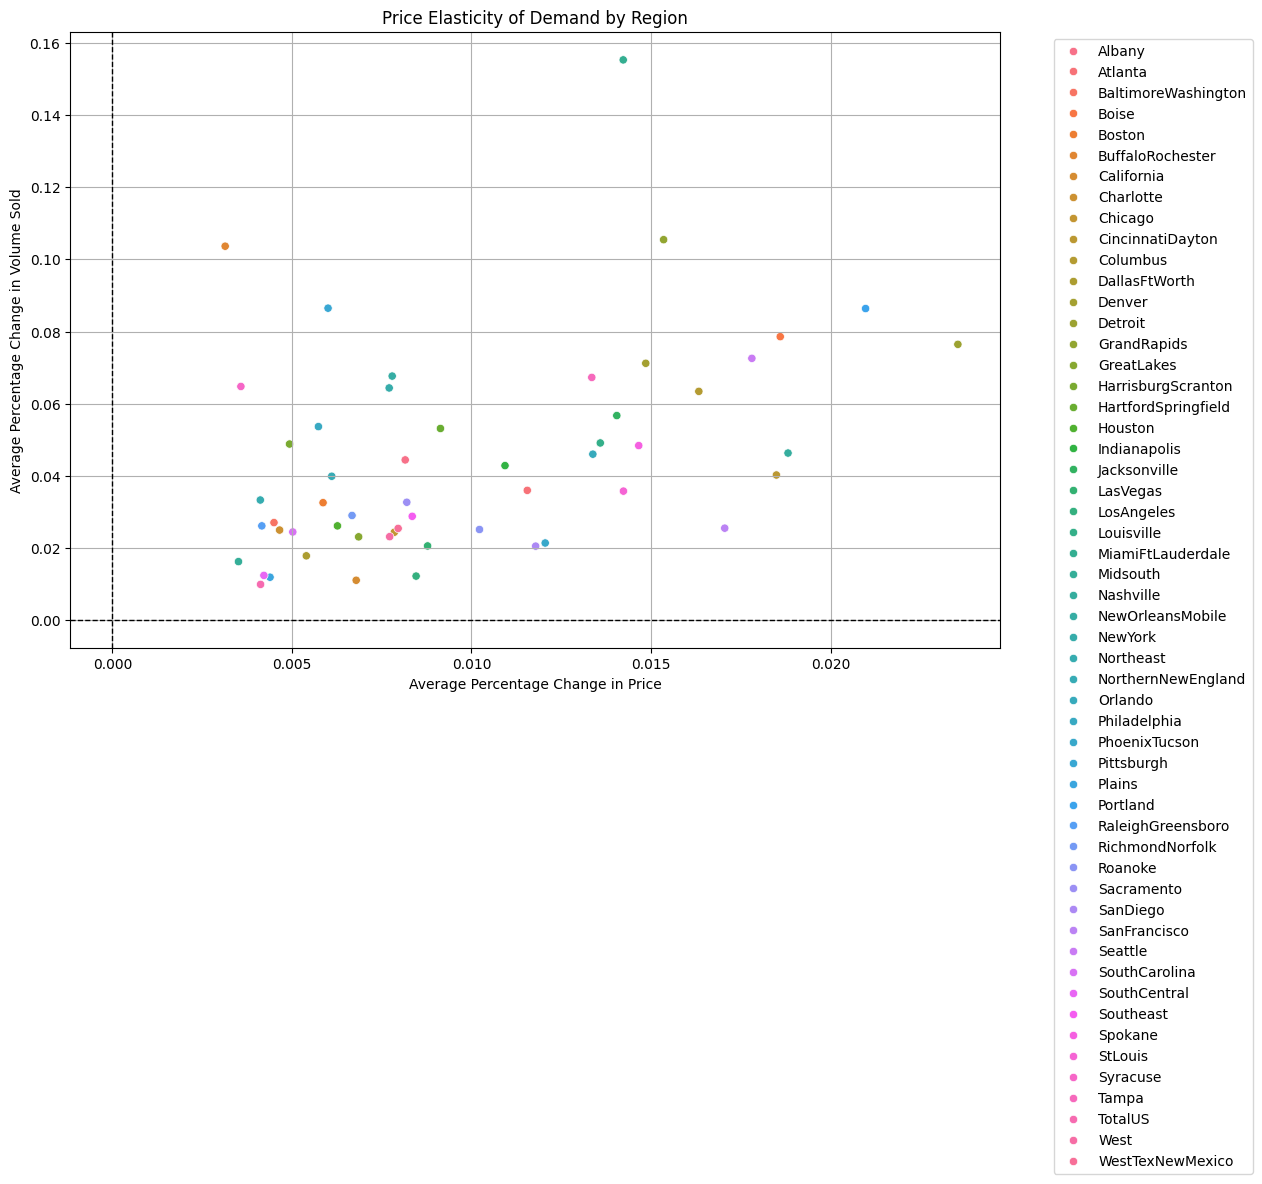

In [ ]:
# Ensure 'Date' is a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Calculating the percentage change in volume and average price for each region
df['Volume_Pct_Change'] = df.groupby('region')['Total Volume'].pct_change()
df['Price_Pct_Change'] = df.groupby('region')['AveragePrice'].pct_change()

# Dropping the NaN values that result from calculating percentage change
df = df.dropna()

# Aggregate the data to get average percentage change in volume and price for each region
elasticity_data = df.groupby('region').agg({
    'Volume_Pct_Change': 'mean',
    'Price_Pct_Change': 'mean'
}).reset_index()

# Plotting the Price Elasticity of Demand by Region
plt.figure(figsize=(12, 8))
sns.scatterplot(data=elasticity_data, x='Price_Pct_Change', y='Volume_Pct_Change', hue='region')
plt.title('Price Elasticity of Demand by Region')
plt.xlabel('Average Percentage Change in Price')
plt.ylabel('Average Percentage Change in Volume Sold')
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.axvline(0, color='k', linestyle='--', linewidth=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


**Inferences:**

1) Small Changes: The average percentage changes in both price and volume sold are small across all regions, indicating that there aren't typically drastic changes in price or volume from period to period.

2) Elasticity Insights: Regions with data points further from the origin (0,0) on the y-axis have a more significant response in volume sold due to price changes. For instance, a region represented by a point high on the y-axis would indicate a larger average change in volume sold for a given price change, suggesting higher elasticity.

3) Price Stability: The clustering of points near the x-axis suggests that price changes do not generally result in significant changes in volume sold, indicating that demand for avocados may be relatively inelastic in most regions.

4) Regional Variability: There is variability between regions in terms of how volume sold responds to price changes. Some regions show a higher average percentage change in volume sold for smaller changes in price, while others show less change in volume sold even with greater price changes.

5) Outliers: Any points far from the majority could be considered outliers. These regions may have unique market conditions, supply chain dynamics, or consumer behaviors that cause them to react differently to price changes than the majority of regions.

6) Strategic Implications: For regions with more elastic demand, pricing strategies could significantly impact the total volume sold. For regions with inelastic demand, changes in pricing may not affect the volume sold, allowing for potential price adjustments to manage revenue.

**5) Impact of Bag Size on Average Price**:

How do different bag sizes (Small Bags, Large Bags, XLarge Bags) correlate with the average price of avocados, and does this relationship differ between conventional and organic types?

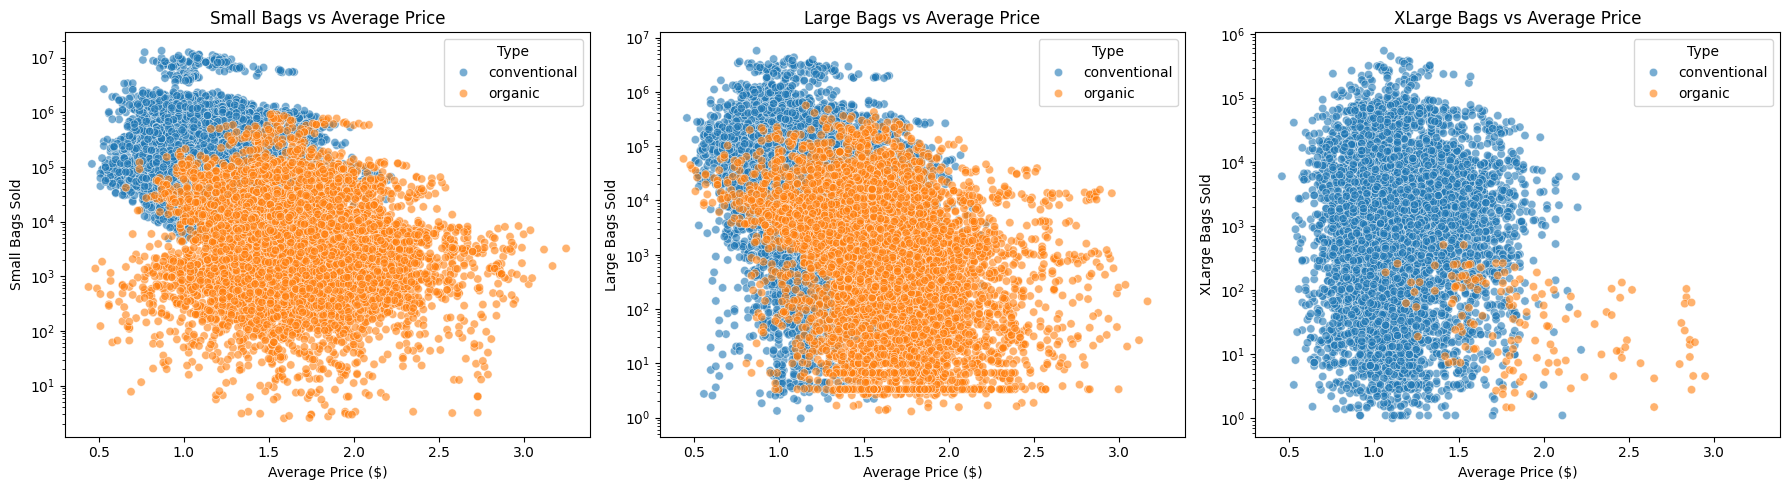

In [ ]:
# Filter the data to include only relevant columns and non-zero bag sizes
df = df[(df['Small Bags'] > 0) | (df['Large Bags'] > 0) | (df['XLarge Bags'] > 0)]

# Create scatter plots for each bag size category
plt.figure(figsize=(18, 5))

# Small Bags vs Average Price
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='AveragePrice', y='Small Bags', hue='type', alpha=0.6)
plt.title('Small Bags vs Average Price')
plt.xlabel('Average Price ($)')
plt.ylabel('Small Bags Sold')
plt.yscale('log')  # Log scale for better visibility
plt.legend(title='Type')

# Large Bags vs Average Price
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='AveragePrice', y='Large Bags', hue='type', alpha=0.6)
plt.title('Large Bags vs Average Price')
plt.xlabel('Average Price ($)')
plt.ylabel('Large Bags Sold')
plt.yscale('log')  # Log scale for better visibility
plt.legend(title='Type')

# XLarge Bags vs Average Price
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='AveragePrice', y='XLarge Bags', hue='type', alpha=0.6)
plt.title('XLarge Bags vs Average Price')
plt.xlabel('Average Price ($)')
plt.ylabel('XLarge Bags Sold')
plt.yscale('log')  # Log scale for better visibility
plt.legend(title='Type')

plt.tight_layout()
plt.show()


**Inferences:**

1) Price Sensitivity: All three plots exhibit a general trend where, as the average price increases, the number of bags sold decreases. This negative correlation suggests that price is a factor influencing the volume of sales, which is a common economic behavior reflecting price sensitivity or elasticity of demand.

2) Bag Size Popularity: Small and large bags seem to be more popular (higher volumes sold) compared to x-large bags. This could be due to consumer preferences or retail packaging strategies.

3) Volume Difference by Type: There is a noticeable difference in volume between conventional and organic avocados, with conventional avocados showing a higher volume of bags sold across all bag sizes. This suggests a larger market size or consumer preference for conventional avocados.

4) Organic Premium: Organic avocados tend to be priced higher than conventional ones across all bag sizes, reflecting the typical market premium for organic produce.